In [ ]:
import pandas as pd

data = pd.read_csv("/content/feeds (4).csv")

data['created_at'] = pd.to_datetime(data['created_at'])

start_timestamp = pd.Timestamp("2024-05-05 09:02:17+05:30")
end_timestamp = pd.Timestamp("2024-05-06 08:50:31+05:30")

filtered_data = data[(data['created_at'] >= start_timestamp) & (data['created_at'] <= end_timestamp)]

filtered_data.to_csv("kitchen_data.csv", index=False)


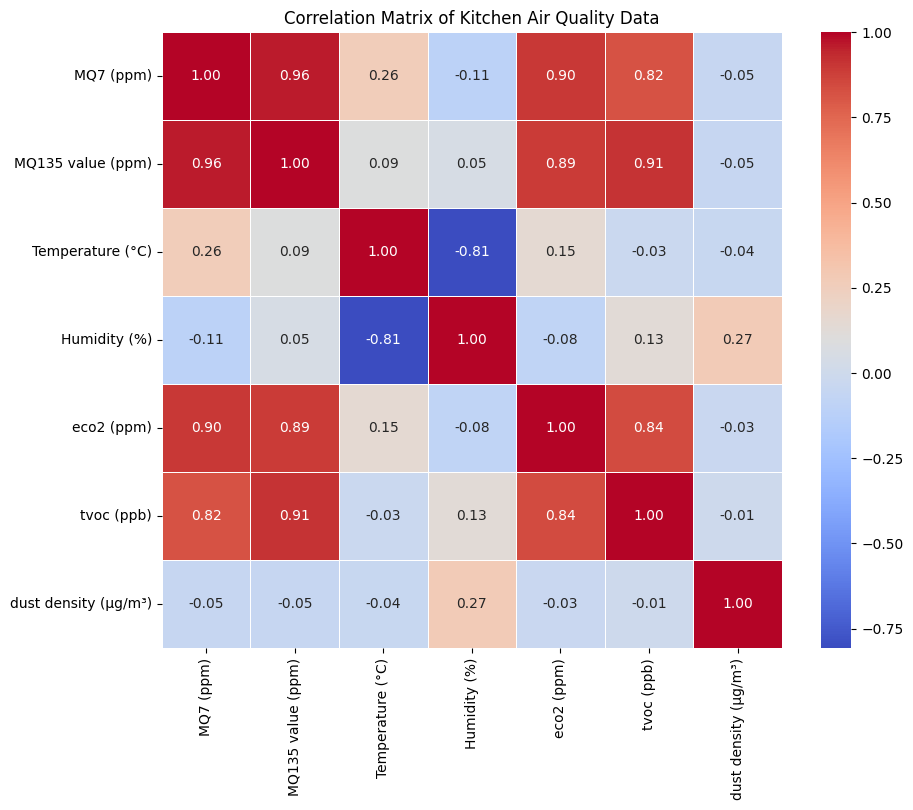

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/content/kitchen_data.csv")

data['created_at'] = pd.to_datetime(data['created_at'])

start_timestamp = pd.Timestamp("2024-05-05 09:02:17+05:30")
end_timestamp = pd.Timestamp("2024-05-06 08:50:31+05:30")

filtered_data = data[(data['created_at'] >= start_timestamp) & (data['created_at'] <= end_timestamp)]

filtered_data = filtered_data.drop(columns=['created_at', 'entry_id'])

filtered_data = filtered_data.rename(columns={'field1': 'MQ7 (ppm)',
                                              'field2': 'MQ135 value (ppm)',
                                              'field3': 'Temperature (°C)',
                                              'field4': 'Humidity (%)',
                                              'field5': 'eco2 (ppm)',
                                              'field6': 'tvoc (ppb)',
                                              'field7': 'dust density (µg/m³)'})

filtered_data = filtered_data[['MQ7 (ppm)', 'MQ135 value (ppm)', 'Temperature (°C)', 'Humidity (%)', 'eco2 (ppm)', 'tvoc (ppb)', 'dust density (µg/m³)']]

correlation_matrix = filtered_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Kitchen Air Quality Data")
plt.show()


In [ ]:
import pandas as pd

data = pd.read_csv("/content/kitchen_data.csv")

data['created_at'] = pd.to_datetime(data['created_at'])

start_timestamp = pd.Timestamp("2024-05-05 09:02:17+05:30")
end_timestamp = pd.Timestamp("2024-05-06 08:50:31+05:30")

filtered_data = data[(data['created_at'] >= start_timestamp) & (data['created_at'] <= end_timestamp)]

average_data = filtered_data[['field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'field7']].mean()

average_data = average_data.rename(index={'field1': 'MQ7',
                                          'field2': 'MQ135 value',
                                          'field3': 'Temperature',
                                          'field4': 'Humidity',
                                          'field5': 'eco2',
                                          'field6': 'tvoc',
                                          'field7': 'dust density'})

print("Average Sensor Data (2024-05-05T09:02:17+05:30 to 2024-05-06T08:50:31+05:30):")
print(average_data)


Average Sensor Data (2024-05-05T09:02:17+05:30 to 2024-05-06T08:50:31+05:30):
MQ7              251.122905
MQ135 value       39.479649
Temperature       35.507023
Humidity          72.866720
eco2            1359.509976
tvoc             374.622506
dust density      46.811652
dtype: float64


In [ ]:
import pandas as pd

data = pd.read_csv("/content/kitchen_data.csv")

data['created_at'] = pd.to_datetime(data['created_at'])

start_timestamp = data['created_at'].iloc[1]
end_timestamp = data['created_at'].iloc[-2]

filtered_data = data[(data['created_at'] >= start_timestamp) & (data['created_at'] <= end_timestamp)]

max_values = filtered_data[['field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'field7']].max()
min_values = filtered_data[['field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'field7']].min()

max_timestamps = filtered_data.loc[filtered_data[['field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'field7']].idxmax()]
min_timestamps = filtered_data.loc[filtered_data[['field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'field7']].idxmin()]

max_values = max_values.rename(index={'field1': 'MQ7',
                                      'field2': 'MQ135 value',
                                      'field3': 'Temperature',
                                      'field4': 'Humidity',
                                      'field5': 'eco2',
                                      'field6': 'tvoc',
                                      'field7': 'dust density'})
min_values = min_values.rename(index={'field1': 'MQ7',
                                      'field2': 'MQ135 value',
                                      'field3': 'Temperature',
                                      'field4': 'Humidity',
                                      'field5': 'eco2',
                                      'field6': 'tvoc',
                                      'field7': 'dust density'})

print("Maximum Values:")
print(max_values)
print("Timestamps for Maximum Values:")
print(max_timestamps['created_at'])
print("\nMinimum Values:")
print(min_values)
print("Timestamps for Minimum Values:")
print(min_timestamps['created_at'])


Maximum Values:
MQ7              417.0
MQ135 value       57.0
Temperature       40.1
Humidity          87.0
eco2            3480.0
tvoc            3862.0
dust density     186.0
dtype: float64
Timestamps for Maximum Values:
978   2024-05-06 04:07:59+05:30
989   2024-05-06 04:18:58+05:30
329   2024-05-05 16:06:54+05:30
997   2024-05-06 04:27:10+05:30
978   2024-05-06 04:07:59+05:30
978   2024-05-06 04:07:59+05:30
459   2024-05-05 19:13:13+05:30
Name: created_at, dtype: datetime64[ns, UTC+05:30]

Minimum Values:
MQ7             176.0
MQ135 value      32.0
Temperature      32.8
Humidity         50.0
eco2            403.0
tvoc              0.0
dust density      0.0
dtype: float64
Timestamps for Minimum Values:
30     2024-05-05 09:32:28+05:30
3      2024-05-05 09:05:02+05:30
1081   2024-05-06 05:51:26+05:30
353    2024-05-05 16:42:57+05:30
4      2024-05-05 09:06:23+05:30
4      2024-05-05 09:06:23+05:30
257    2024-05-05 14:32:28+05:30
Name: created_at, dtype: datetime64[ns, UTC+05:30]


In [ ]:
import pandas as pd

data = pd.read_csv("/content/kitchen_data.csv")

data['created_at'] = pd.to_datetime(data['created_at'])

data['hour'] = data['created_at'].dt.floor('H')

data['data_points'] = data.groupby('hour')['created_at'].transform('count')

sensor_data_columns = ['field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'field7']

hourly_data_sum = data.groupby('hour')[sensor_data_columns].sum()

total_data_points = data['data_points'].sum()

average_hourly_data = hourly_data_sum / total_data_points

average_hourly_data = average_hourly_data.rename(columns={'field1': 'MQ7',
                                                          'field2': 'MQ135 value',
                                                          'field3': 'Temperature',
                                                          'field4': 'Humidity',
                                                          'field5': 'eco2',
                                                          'field6': 'tvoc',
                                                          'field7': 'dust density'})

print("Average Hourly Sensor Data:")
print(average_hourly_data)


Average Hourly Sensor Data:
                                MQ7  MQ135 value  Temperature  Humidity  \
hour                                                                      
2024-05-05 09:00:00+05:30  0.177092     0.031121     0.029572  0.056948   
2024-05-05 10:00:00+05:30  0.216162     0.033673     0.031863  0.054601   
2024-05-05 11:00:00+05:30  0.209078     0.032940     0.030636  0.051507   
2024-05-05 12:00:00+05:30  0.098467     0.017453     0.017978  0.029640   
2024-05-05 13:00:00+05:30  0.130307     0.020855     0.021688  0.031899   
2024-05-05 14:00:00+05:30  0.123722     0.016910     0.014813  0.023788   
2024-05-05 15:00:00+05:30  0.211161     0.029757     0.026563  0.045934   
2024-05-05 16:00:00+05:30  0.190658     0.025504     0.023309  0.031151   
2024-05-05 17:00:00+05:30  0.127330     0.017306     0.016288  0.021266   
2024-05-05 18:00:00+05:30  0.219594     0.032617     0.032321  0.058664   
2024-05-05 19:00:00+05:30  0.187241     0.030637     0.029216  0.061685 

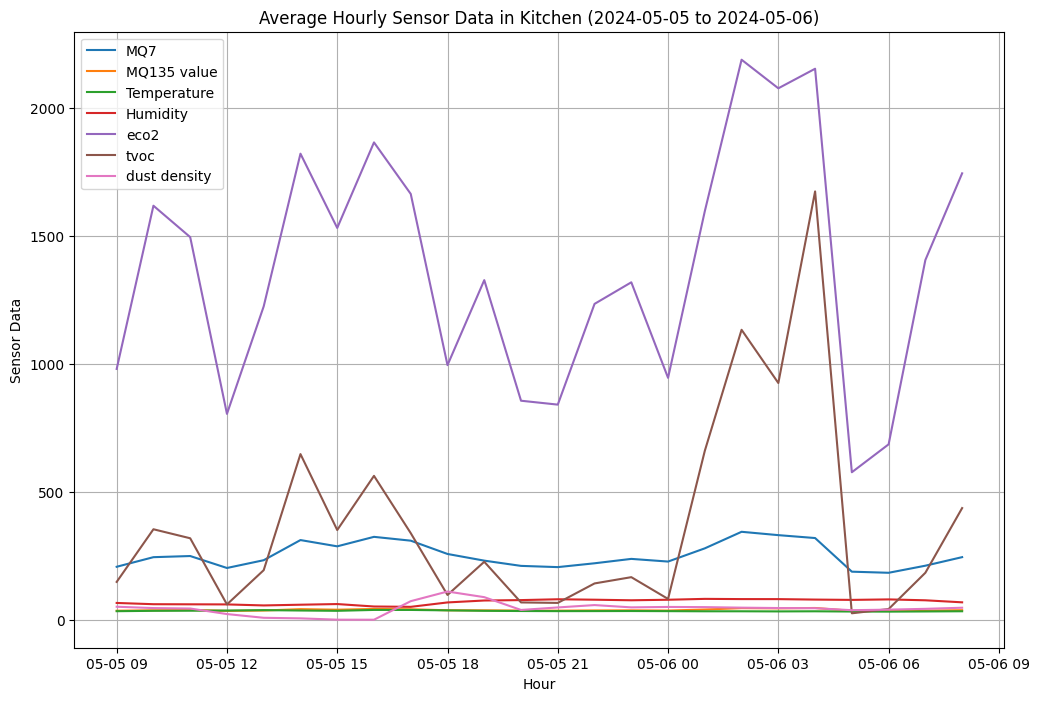

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/kitchen_data.csv")

data['created_at'] = pd.to_datetime(data['created_at'])

start_timestamp = pd.Timestamp("2024-05-05 09:02:17+05:30")
end_timestamp = pd.Timestamp("2024-05-06 08:50:31+05:30")
filtered_data = data[(data['created_at'] >= start_timestamp) & (data['created_at'] <= end_timestamp)]

filtered_data['hour'] = filtered_data['created_at'].dt.floor('H')

average_hourly_data = filtered_data.groupby('hour').mean()[['field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'field7']]

average_hourly_data = average_hourly_data.rename(columns={'field1': 'MQ7',
                                                          'field2': 'MQ135 value',
                                                          'field3': 'Temperature',
                                                          'field4': 'Humidity',
                                                          'field5': 'eco2',
                                                          'field6': 'tvoc',
                                                          'field7': 'dust density'})

plt.figure(figsize=(12, 8))
for column in average_hourly_data.columns:
    plt.plot(average_hourly_data.index, average_hourly_data[column], label=column)

plt.title("Average Hourly Sensor Data in Kitchen (2024-05-05 to 2024-05-06)")
plt.xlabel("Hour")
plt.ylabel("Sensor Data")
plt.legend()
plt.grid(True)
plt.show()


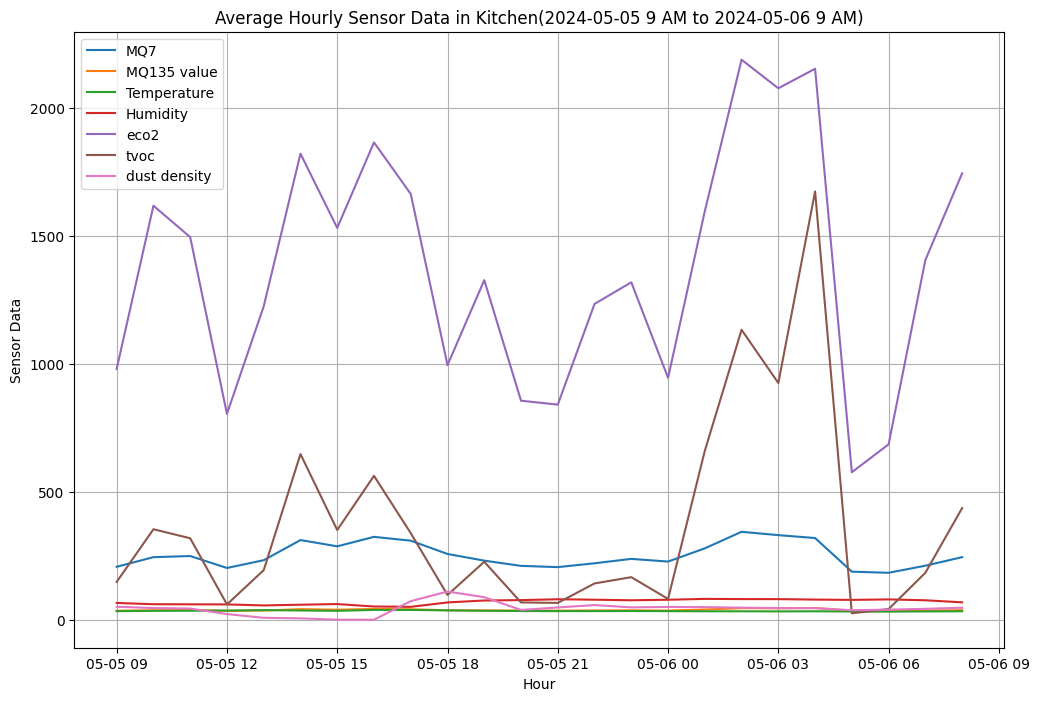

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/kitchen_data.csv")

data['created_at'] = pd.to_datetime(data['created_at'])

start_timestamp = pd.Timestamp("2024-05-05 09:02:17+05:30")
end_timestamp = pd.Timestamp("2024-05-06 08:50:31+05:30")
filtered_data = data[(data['created_at'] >= start_timestamp) & (data['created_at'] <= end_timestamp)]

filtered_data['hour'] = filtered_data['created_at'].dt.floor('H')

average_hourly_data = filtered_data.groupby('hour').mean()[['field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'field7']]

average_hourly_data = average_hourly_data.rename(columns={'field1': 'MQ7',
                                                          'field2': 'MQ135 value',
                                                          'field3': 'Temperature',
                                                          'field4': 'Humidity',
                                                          'field5': 'eco2',
                                                          'field6': 'tvoc',
                                                          'field7': 'dust density'})

plt.figure(figsize=(12, 8))
for column in average_hourly_data.columns:
    plt.plot(average_hourly_data.index, average_hourly_data[column], label=column)

plt.title("Average Hourly Sensor Data in Kitchen(2024-05-05 9 AM to 2024-05-06 9 AM)")
plt.xlabel("Hour")
plt.ylabel("Sensor Data")
plt.legend()
plt.grid(True)
plt.show()


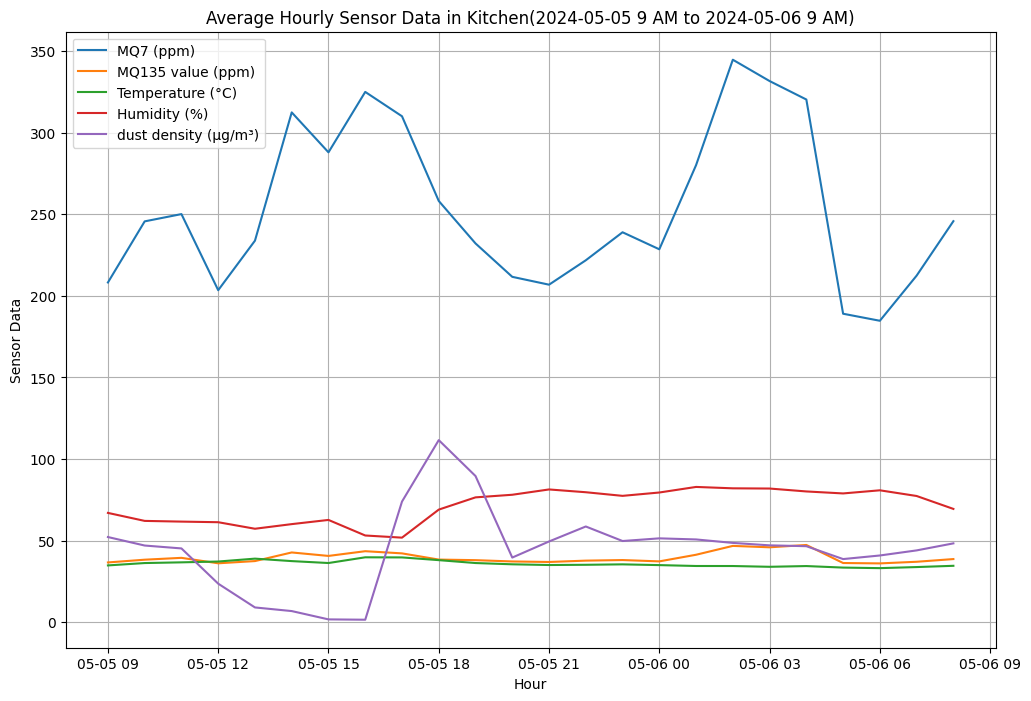

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/kitchen_data.csv")

data['created_at'] = pd.to_datetime(data['created_at'])

start_timestamp = pd.Timestamp("2024-05-05 09:02:17+05:30")
end_timestamp = pd.Timestamp("2024-05-06 08:50:31+05:30")
filtered_data = data[(data['created_at'] >= start_timestamp) & (data['created_at'] <= end_timestamp)]

filtered_data['hour'] = filtered_data['created_at'].dt.floor('H')

average_hourly_data = filtered_data.groupby('hour').mean()[['field1', 'field2', 'field3', 'field4', 'field7']]

average_hourly_data = average_hourly_data.rename(columns={'field1': 'MQ7 (ppm)',
                                                          'field2': 'MQ135 value (ppm)',
                                                          'field3': 'Temperature (°C)',
                                                          'field4': 'Humidity (%)',
                                                          'field7': 'dust density (µg/m³)'})

plt.figure(figsize=(12, 8))
for column in average_hourly_data.columns:
    plt.plot(average_hourly_data.index, average_hourly_data[column], label=column)

plt.title("Average Hourly Sensor Data in Kitchen(2024-05-05 9 AM to 2024-05-06 9 AM)")
plt.xlabel("Hour")
plt.ylabel("Sensor Data")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('kitchen_data.csv')

df.rename(columns={'field1': 'MQ7 (ppm)',
                   'field2': 'MQ135 value (ppm)',
                   'field3': 'Temperature (°C)',
                   'field4': 'Humidity (%)',
                   'field5': 'eco2 (ppm)',
                   'field6': 'tvoc (ppb)',
                   'field7': 'dust density (µg/m³)'}, inplace=True)

print("\nStatistics of Data for All Pollutants:")
print(df.describe())



Statistics of Data for All Pollutants:
          entry_id    MQ7 (ppm)  MQ135 value (ppm)  Temperature (°C)  \
count  1253.000000  1253.000000        1253.000000       1253.000000   
mean   4728.000000   251.122905          39.479649         35.507023   
std     361.854252    56.407726           4.228000          1.786388   
min    4102.000000   176.000000          32.000000         32.800000   
25%    4415.000000   209.000000          37.000000         34.200000   
50%    4728.000000   231.000000          38.000000         35.200000   
75%    5041.000000   290.000000          41.000000         36.300000   
max    5354.000000   417.000000          57.000000         40.100000   

       Humidity (%)   eco2 (ppm)   tvoc (ppb)  dust density (µg/m³)  latitude  \
count    1253.00000  1253.000000  1253.000000           1253.000000       0.0   
mean       72.86672  1359.509976   374.622506             46.811652       NaN   
std         9.48577   613.721468   595.364688             26.718320 

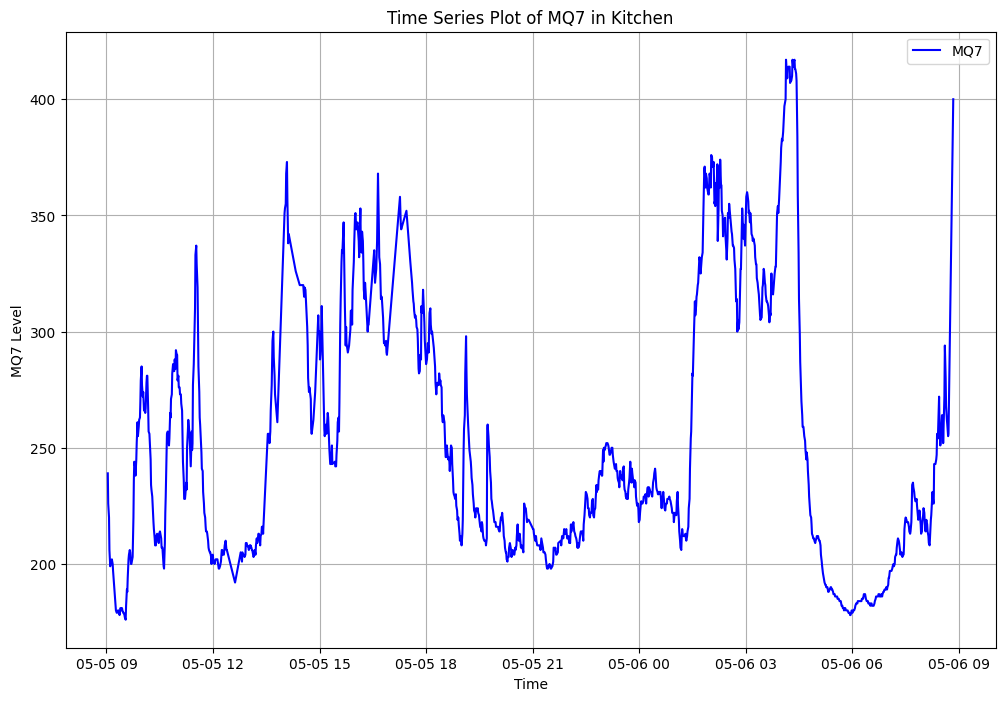

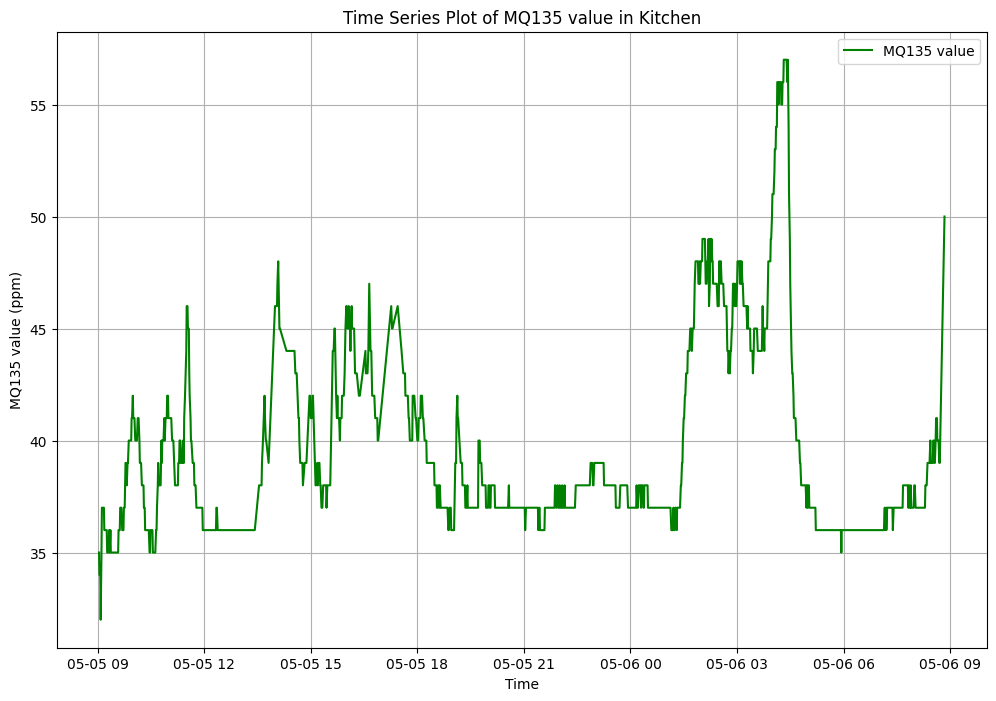

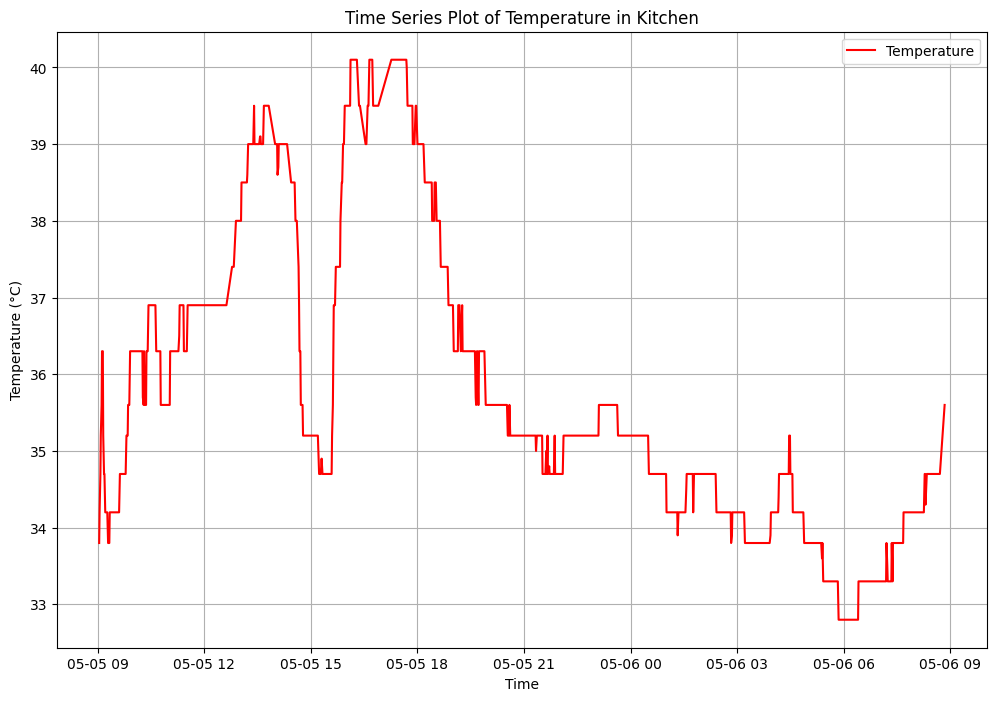

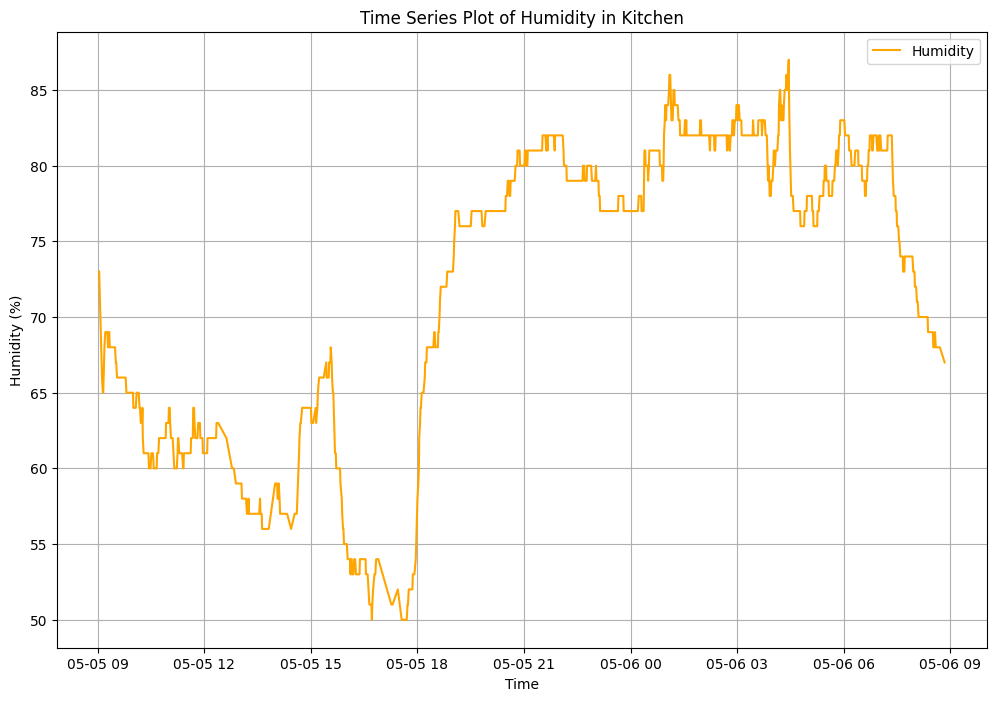

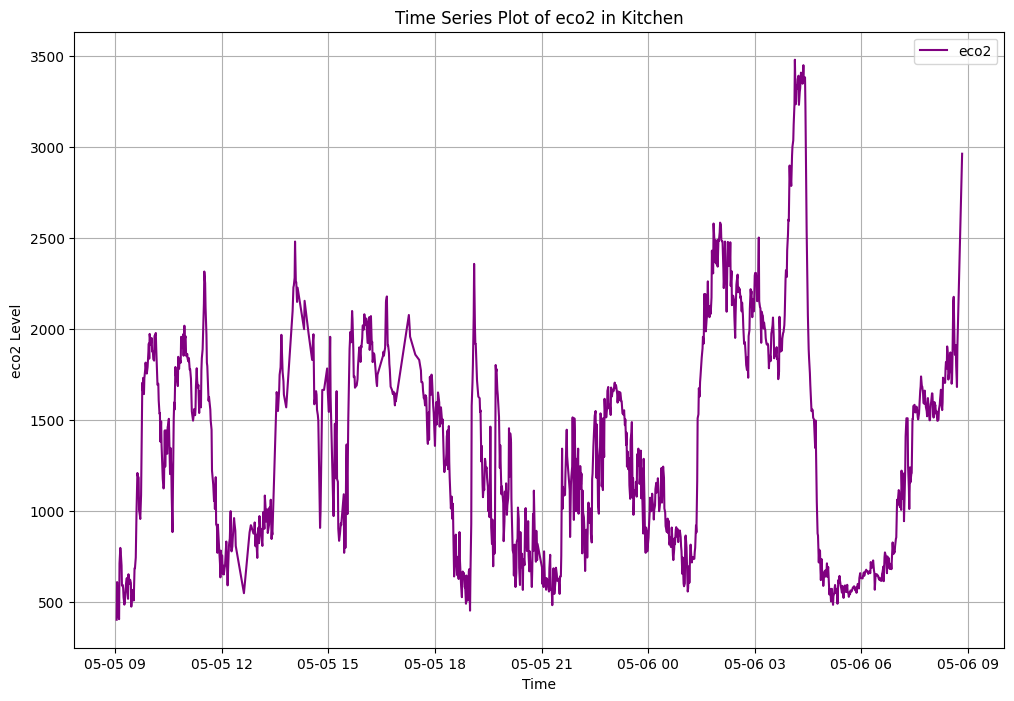

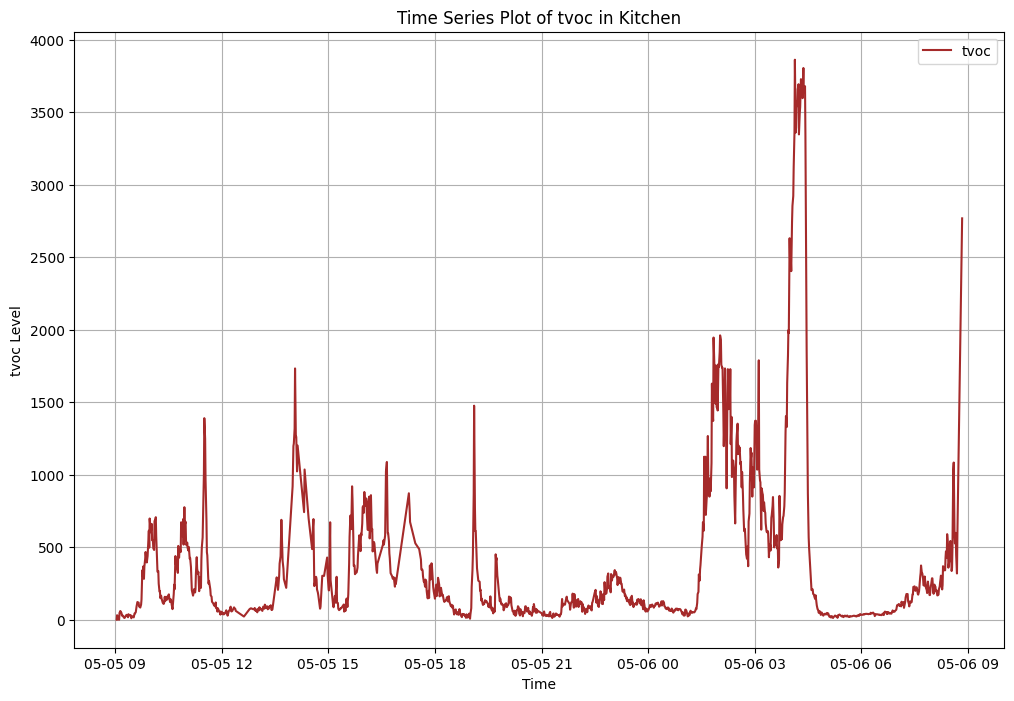

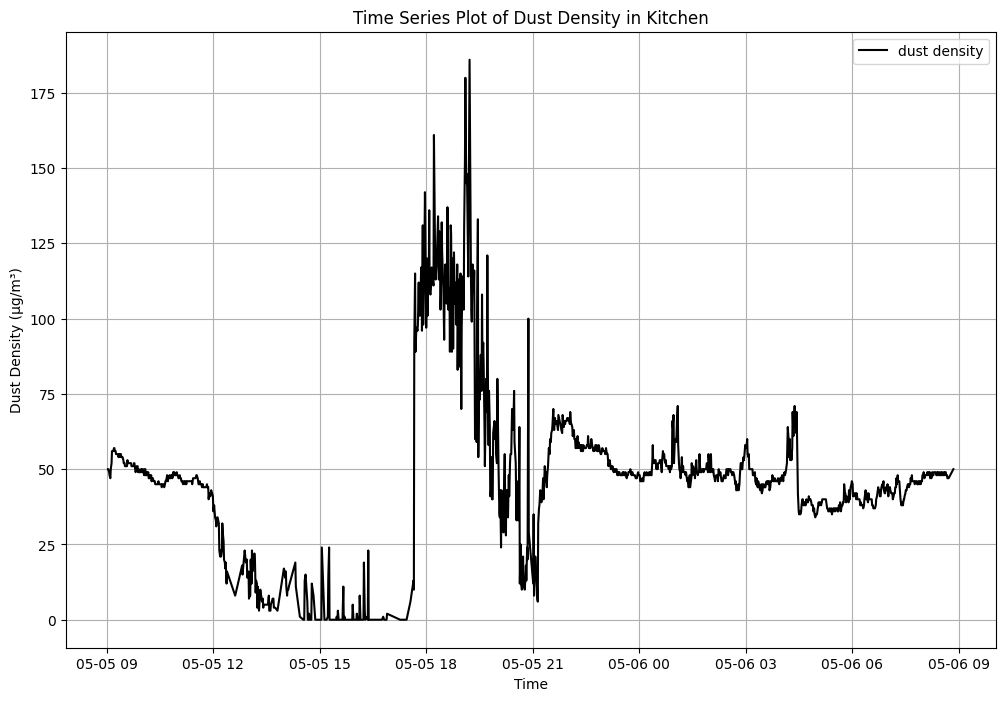

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/kitchen_data.csv")

data['created_at'] = pd.to_datetime(data['created_at'])

start_timestamp = pd.Timestamp("2024-05-05 09:02:17+05:30")
end_timestamp = pd.Timestamp("2024-05-06 08:50:31+05:30")
filtered_data = data[(data['created_at'] >= start_timestamp) & (data['created_at'] <= end_timestamp)]

plt.figure(figsize=(12, 8))

plt.plot(filtered_data['created_at'], filtered_data['field1'], label='MQ7', color='blue')
plt.title("Time Series Plot of MQ7 in Kitchen")
plt.xlabel("Time")
plt.ylabel("MQ7 Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(filtered_data['created_at'], filtered_data['field2'], label='MQ135 value', color='green')
plt.title("Time Series Plot of MQ135 value in Kitchen")
plt.xlabel("Time")
plt.ylabel("MQ135 value (ppm)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(filtered_data['created_at'], filtered_data['field3'], label='Temperature', color='red')
plt.title("Time Series Plot of Temperature in Kitchen")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(filtered_data['created_at'], filtered_data['field4'], label='Humidity', color='orange')
plt.title("Time Series Plot of Humidity in Kitchen")
plt.xlabel("Time")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(filtered_data['created_at'], filtered_data['field5'], label='eco2', color='purple')
plt.title("Time Series Plot of eco2 in Kitchen")
plt.xlabel("Time")
plt.ylabel("eco2 Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(filtered_data['created_at'], filtered_data['field6'], label='tvoc', color='brown')
plt.title("Time Series Plot of tvoc in Kitchen")
plt.xlabel("Time")
plt.ylabel("tvoc Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(filtered_data['created_at'], filtered_data['field7'], label='dust density', color='black')
plt.title("Time Series Plot of Dust Density in Kitchen")
plt.xlabel("Time")
plt.ylabel("Dust Density (µg/m³)")
plt.legend()
plt.grid(True)
plt.show()


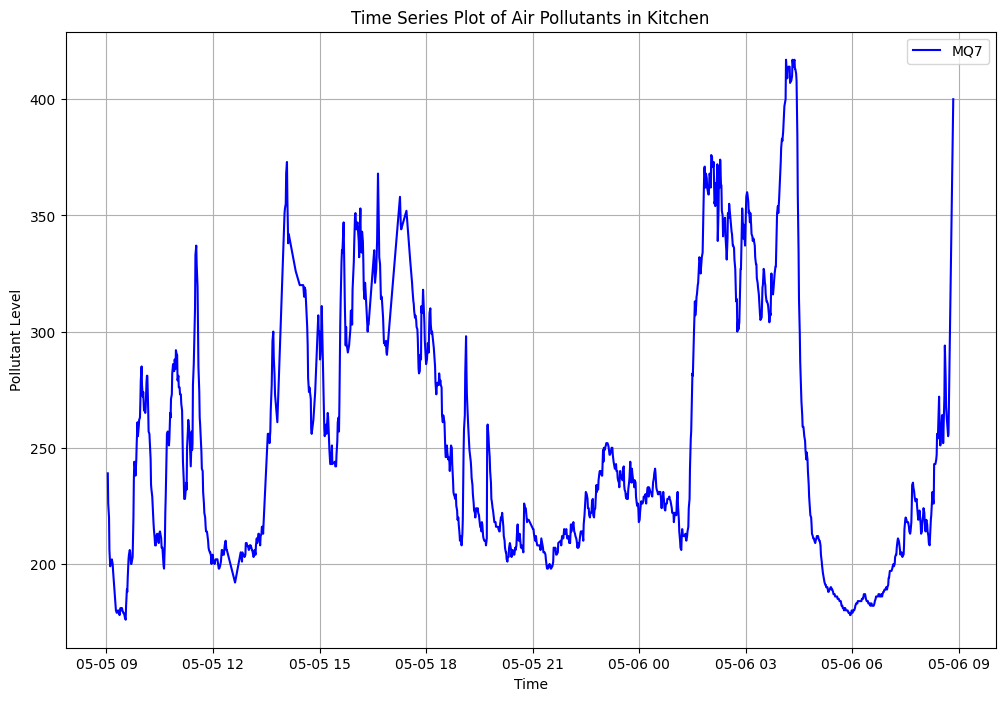

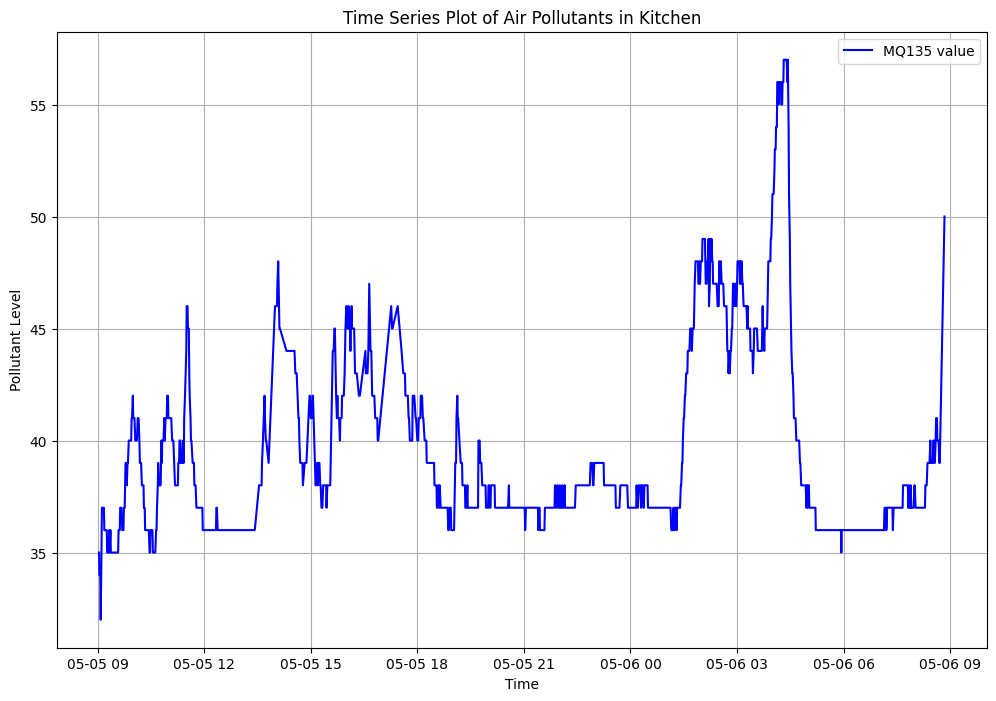

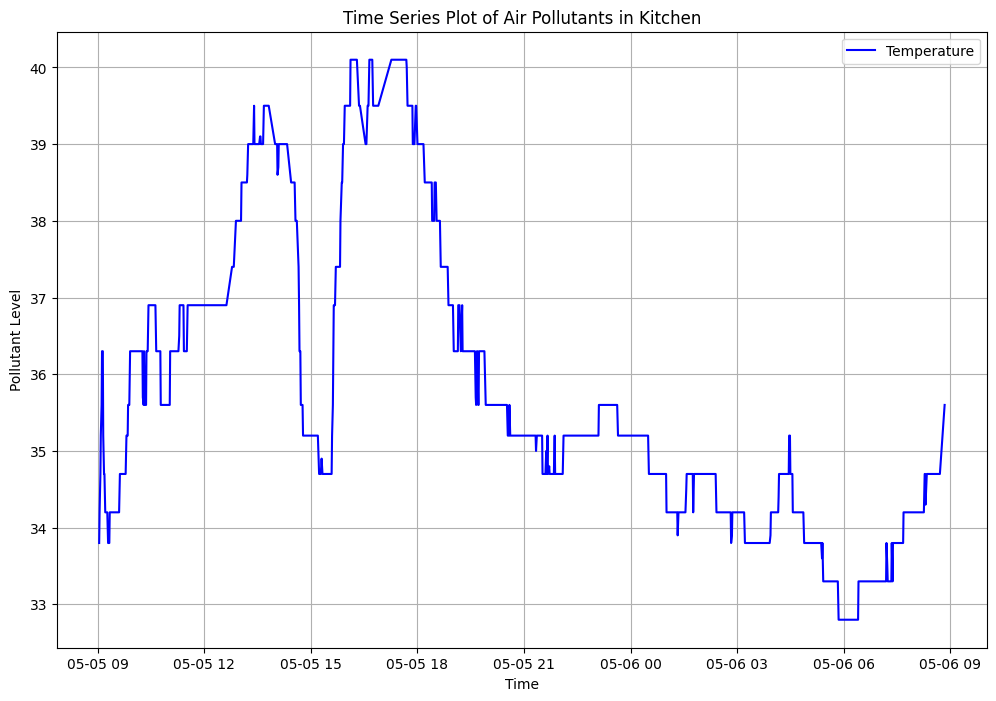

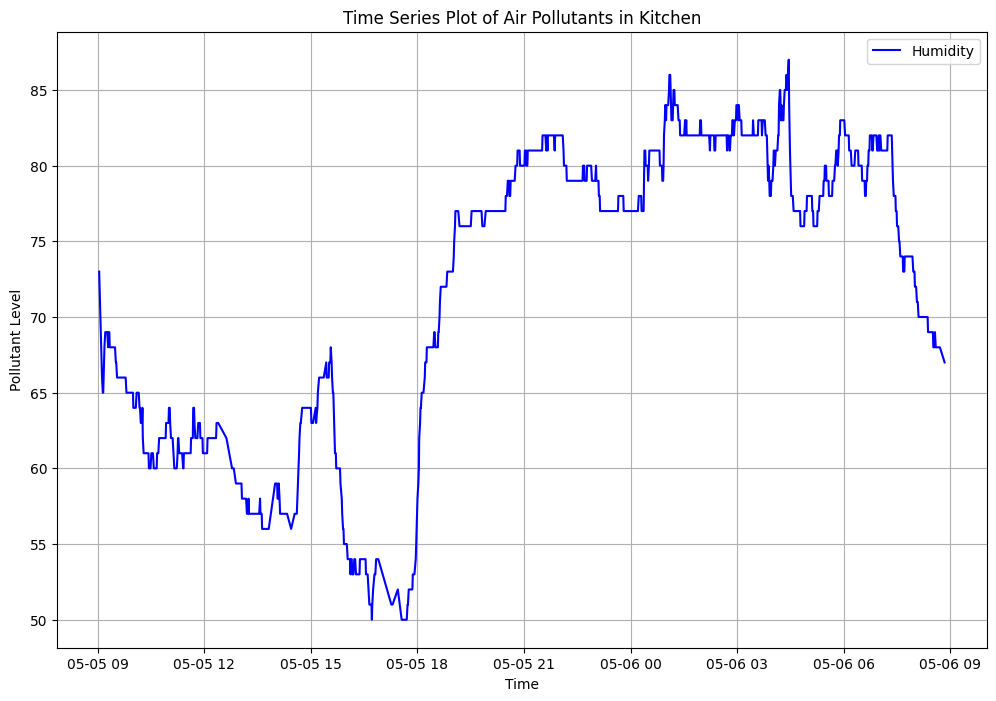

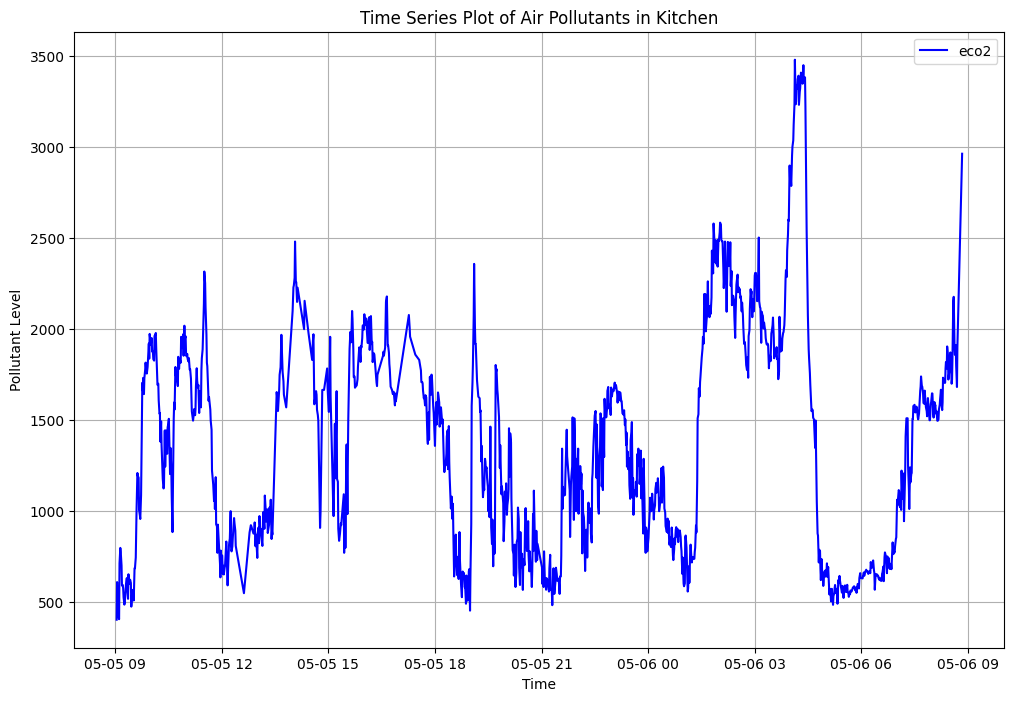

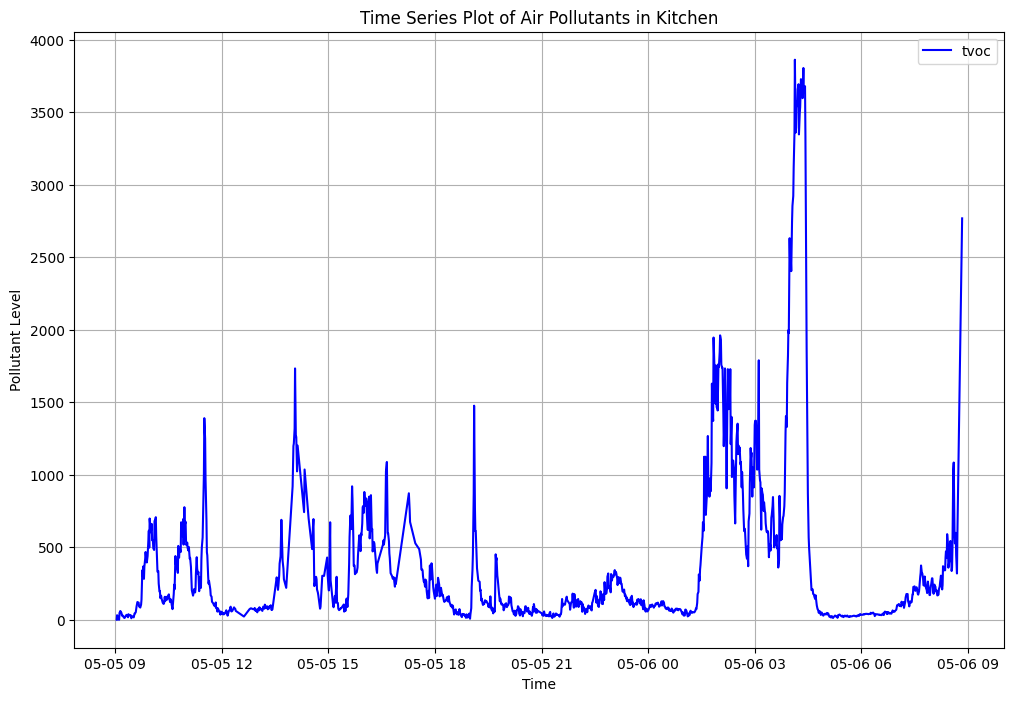

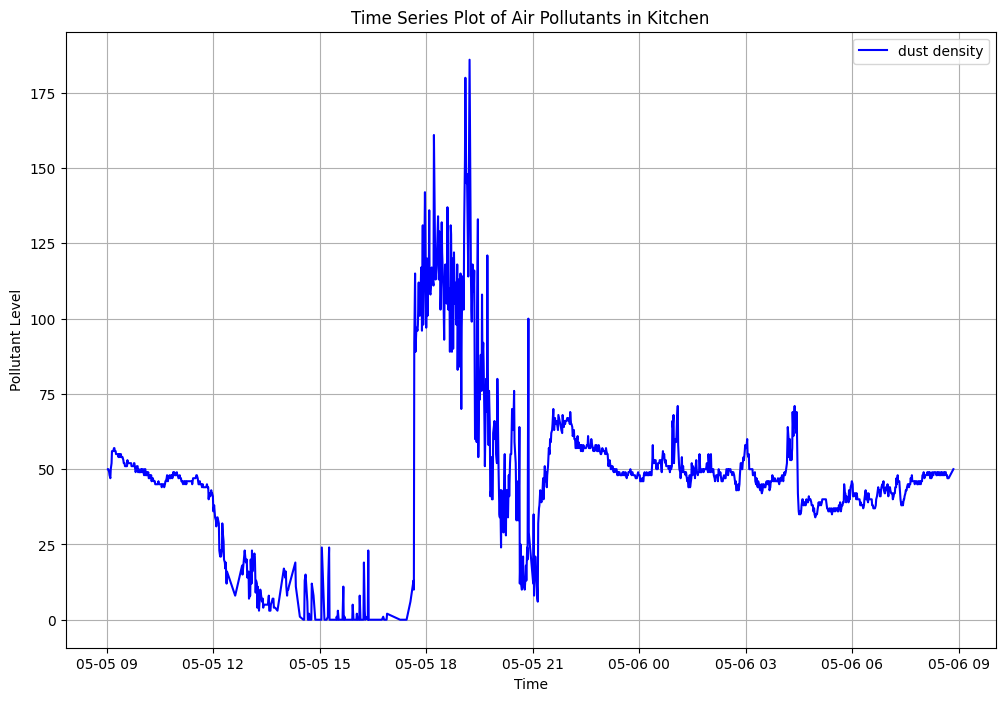

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/kitchen_data.csv")

data['created_at'] = pd.to_datetime(data['created_at'])

start_timestamp = pd.Timestamp("2024-05-05 09:02:17+05:30")
end_timestamp = pd.Timestamp("2024-05-06 08:50:31+05:30")
filtered_data = data[(data['created_at'] >= start_timestamp) & (data['created_at'] <= end_timestamp)]

plt.figure(figsize=(12, 8))
color = 'blue'

plt.plot(filtered_data['created_at'], filtered_data['field1'], label='MQ7', color=color)
plt.title("Time Series Plot of Air Pollutants in Kitchen")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(filtered_data['created_at'], filtered_data['field2'], label='MQ135 value', color=color)
plt.title("Time Series Plot of Air Pollutants in Kitchen")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(filtered_data['created_at'], filtered_data['field3'], label='Temperature', color=color)
plt.title("Time Series Plot of Air Pollutants in Kitchen")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(filtered_data['created_at'], filtered_data['field4'], label='Humidity', color=color)
plt.title("Time Series Plot of Air Pollutants in Kitchen")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(filtered_data['created_at'], filtered_data['field5'], label='eco2', color=color)
plt.title("Time Series Plot of Air Pollutants in Kitchen")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(filtered_data['created_at'], filtered_data['field6'], label='tvoc', color=color)
plt.title("Time Series Plot of Air Pollutants in Kitchen")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(filtered_data['created_at'], filtered_data['field7'], label='dust density', color=color)
plt.title("Time Series Plot of Air Pollutants in Kitchen")
plt.xlabel("Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()
